**Analysis of Carbon Intensity Data from Electricity Maps**

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Import Carbon Intensity Data for the UK, France, Germany and California**  
Using 2023 hourly data retrieved from the [Electricity Maps Data Portal](https://www.electricitymaps.com/data-portal)

In [103]:
# Define Constants
cols = ['datetime_utc', 'country', 'zone', 'zone_id', 'ci_direct', 'ci_lca', 'low_carbon_%', 'renewable_%', 'source', 'estimated', 'method']
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekdays_24 = np.repeat(weekdays, 24)
weekdays_vals = np.resize(weekdays_24, 8760)
day_starts = [1,25,49,73,97,121,145]
days = range(1,366,1)
hour_cols = [str(time).zfill(2) for time in range(0,24,1)]
month_cols = [str(month).zfill(2) for month in range(1,13,1)]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]

In [104]:
# Function to Import Data for Region using Electricity Maps Data
def prepare_region(filepath, date_sep="-"):
    df = pd.read_csv(filepath, names=cols, header=None, skiprows=1)
    df['weekday'] = weekdays_vals
    df[['date', 'hour']] = df['datetime_utc'].str.split(' ', n=1, expand=True)
    df[['day', 'month', 'year']] = df['date'].str.split(date_sep, n=2, expand=True)
    df.drop(['country', 'zone', 'source', 'estimated', 'method', 'year'], inplace=True, axis=1)
    return df

In [105]:
# UK Data
uk_ci_df = prepare_region('data/GB_2023_hourly.csv', '/')

# France Data
fr_ci_df = prepare_region('data/FR_2023_hourly.csv')

# Germany Data
de_ci_df = prepare_region('data/DE_2023_hourly.csv')

# California Data
ca_ci_df = prepare_region('data/US-CAL-CISO_2023_hourly.csv')

**Common Functions**
- Utility Functions
- Plotting Functions

In [106]:
## Functions that Perform Utilities

# Calculate Avg. CI for Each Day
def avg_ci_by_date(df):
    tmp_df = df.groupby('date', as_index=False, sort=False)['ci_direct'].mean()
    return tmp_df['ci_direct'].values

# Calculate Avg. CI for a Day
def avg_ci_for_day(df):
    tmp_df = df.groupby('hour', as_index=False, sort=False)['ci_direct'].mean()
    return tmp_df['ci_direct'].values

# Set-Up Figure
def setup_figure(size=None):
    if size is not None:
        plt.figure(figsize=size)
    else:
        plt.figure(figsize=(18,6))

# Format Figure
def format_figure(xticks=None,xticklabels=None,xlabel=None,ylabel=None,legendloc=None, title=None, yticks=None, yticklabels=None):
    if xticks is not None and xticklabels is not None:
        plt.xticks(xticks, labels=xticklabels)

    if xlabel is not None:
        plt.xlabel(xlabel)

    if ylabel is not None:
        plt.ylabel(ylabel)

    if legendloc is not None:
        plt.legend(loc=legendloc)

    if title is not None:
        plt.title(title)

    if yticks is not None and yticklabels is not None:
        plt.yticks(yticks, labels=yticklabels)

In [114]:
## Functions that Plot Graphs

# Plot the Average CI for Each Day Comparing all Regions
def plot_avg_ci_by_date_compare_all():
    setup_figure()

    plt.plot(days, avg_ci_by_date(uk_ci_df), 'b', label='UK')
    plt.plot(days, avg_ci_by_date(de_ci_df), 'g', label='DE')
    plt.plot(days, avg_ci_by_date(fr_ci_df), 'r', label='FR')
    plt.plot(days, avg_ci_by_date(ca_ci_df), 'y', label='CA')
    format_figure(xticks=month_starts, xticklabels=month_names, 
              xlabel='Month of 2023', ylabel='Average Carbon Intensity', 
              legendloc='upper right', title='Average Carbon Intensity over 2023 for all Regions (UK, Germany, France, California)')

    plt.show()

# Plot the Average CI for a Day Comparing all Regions
def plot_avg_ci_for_day_compare_all():
    setup_figure()

    plt.plot(hour_cols, avg_ci_for_day(uk_ci_df), 'b', label='UK')
    plt.plot(hour_cols, avg_ci_for_day(de_ci_df), 'g', label='DE')
    plt.plot(hour_cols, avg_ci_for_day(fr_ci_df), 'r', label='FR')
    plt.plot(hour_cols, avg_ci_for_day(ca_ci_df), 'y', label='CA')

    format_figure(xlabel='Hour of Day', ylabel='Average Carbon Intensity', 
                 legendloc='upper right', title=f"Average Carbon Intensity for a Day Comparing all Regions (UK, Germany, France, California)")

    plt.show()

# Plot the Average CI for a Day Comparing all Months
def plot_avg_ci_for_day_compare_month(df=None, region=None):
    setup_figure()

    df_by_month = df.groupby('month', as_index=False, sort=False)
    colours = ['midnightblue', 'blue', 'lime', 'yellow', 'magenta', 'orange', 'red', 'maroon', 'forestgreen', 'saddlebrown', 'cyan', 'lightslategray']

    for month_num, colour, month_name in zip(month_cols, colours, month_names):
        data = df_by_month.get_group(month_num)
        plt.plot(hour_cols, avg_ci_for_day(data), colour, label=month_name)

    format_figure(xlabel='Hour of Day', ylabel='Average Carbon Intensity', 
                 legendloc='upper right', title=f"Average Carbon Intensity for a Day Comparing all Months for {region}")

    plt.show()

# Plot the Average CI for a Week (Combined View)
def plot_avg_ci_for_week(df=None, region=None):
    setup_figure()

    df_for_weekdays = df.groupby('weekday', as_index=False, sort=False)
    colours = ['midnightblue', 'blue', 'lime', 'yellow', 'magenta', 'orange', 'red']

    for (weekday, df), colour in zip(df_for_weekdays, colours):
        plt.plot(hour_cols, avg_ci_for_day(df), colour, label=weekday)

    format_figure(xlabel='Hour of Day', ylabel='Average Carbon Intensity', 
                 legendloc='upper right', title=f"Average Carbon Intensity for a Week for {region}")

    plt.show()

# Plot the Average CI for a Week (Extended View)
def plot_avg_ci_for_week_long(df=None, region=None, period=None):
    setup_figure()

    df_for_weekdays = df.groupby('weekday', as_index=False, sort=False)
    colours = ['midnightblue', 'blue', 'lime', 'yellow', 'magenta', 'orange', 'red']

    for (weekday, df), colour, day in zip(df_for_weekdays, colours, range(0,7,1)):
        plt.plot([int(hour) + 1 + (24 * day) for hour in hour_cols], avg_ci_for_day(df), colour, label=weekday)

    format_figure(xlabel='Hour of Week', ylabel='Average Carbon Intensity', 
                  xticks=day_starts, xticklabels=weekdays,
                 legendloc='upper right', title=f"Average Carbon Intensity for a Week across {period} for {region}")

    plt.show()

# Plot the Average CI for a Day in One Month
def plot_avg_ci_for_day_in_month(df=None, region=None, month=None, name=None):
    setup_figure()

    df_for_month = df.groupby('month', as_index=False, sort=False).get_group(month)

    plt.plot(hour_cols, avg_ci_for_day(df_for_month), 'r')

    format_figure(xlabel='Hour of Day', ylabel='Average Carbon Intensity', 
                  title=f"Average Carbon Intensity for a Day in {name} for {region}")

    plt.show()

# Plot the Average CI for a Day Comparing across Quarters
def plot_avg_ci_for_day_compare_quarter(df=None, region=None):
    setup_figure()

    quarters = np.repeat(['Q1', 'Q2', 'Q3', 'Q4'], 3)
    df_by_month = df.groupby('month', as_index=False, sort=False)
    colours = ['r', 'g', 'b', 'y']
    quarter_dfs = {}

    for (_, df), quarter in zip(df_by_month, quarters):
        if quarter in quarter_dfs:
            quarter_dfs[quarter] = pd.concat([quarter_dfs[quarter], df], axis=0)
        else:
            quarter_dfs[quarter] = df

    for (quarter, df), colour in zip(quarter_dfs.items(), colours):
        plt.plot(hour_cols, avg_ci_for_day(df), colour, label=quarter)

    format_figure(xlabel='Hour of Day', ylabel='Average Carbon Intensity', 
                  legendloc='upper right', title=f"Average Carbon Intensity for a Day Comparing all Quarters for {region}")

    plt.show()

**Plot the Average Carbon Intensity for 2023 (UK, Germany, France, California)**

- This graph should highlight the relative variation throughout the year comparing our given regions, with France consistently the lowest, and Germany the highest in 2023. 

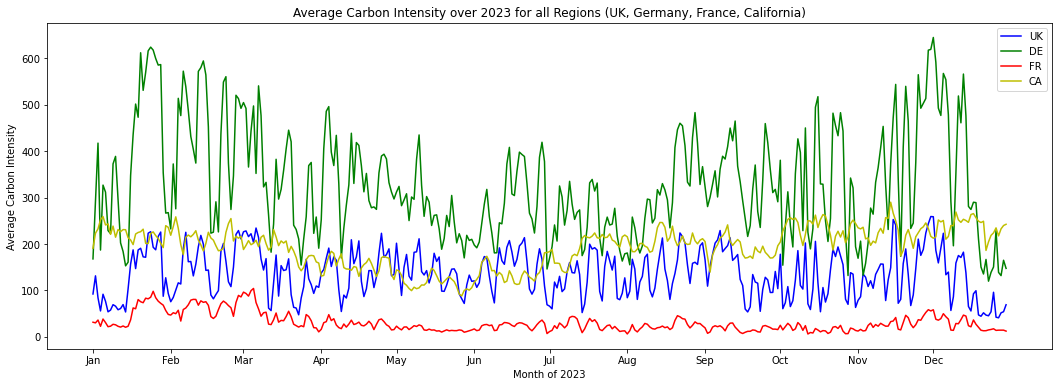

In [110]:
plot_avg_ci_by_date_compare_all()

**Plot the Average Carbon Intensity for Each Region Comparing the Average Day CI for Each Month**

- These graphs definitely have too much going on at once, but it does illustrate the difference in Carbon Intensity across a given day for different months of the year! 
- The sections focusing on each region individually should be more illustrative. 

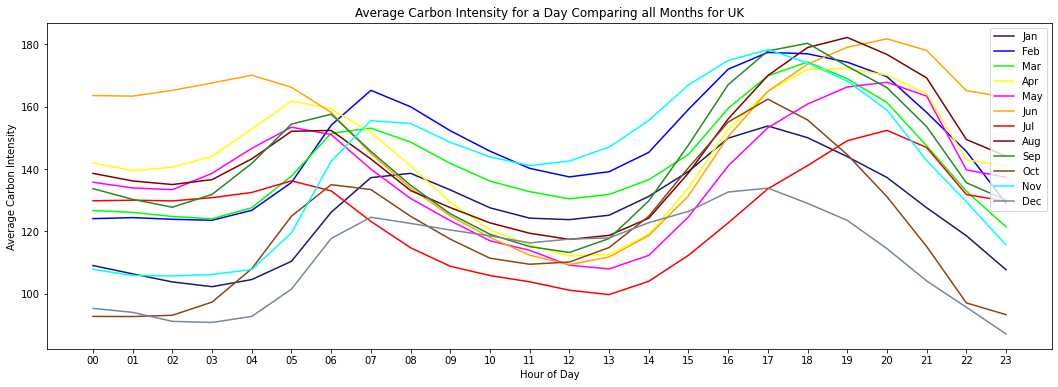

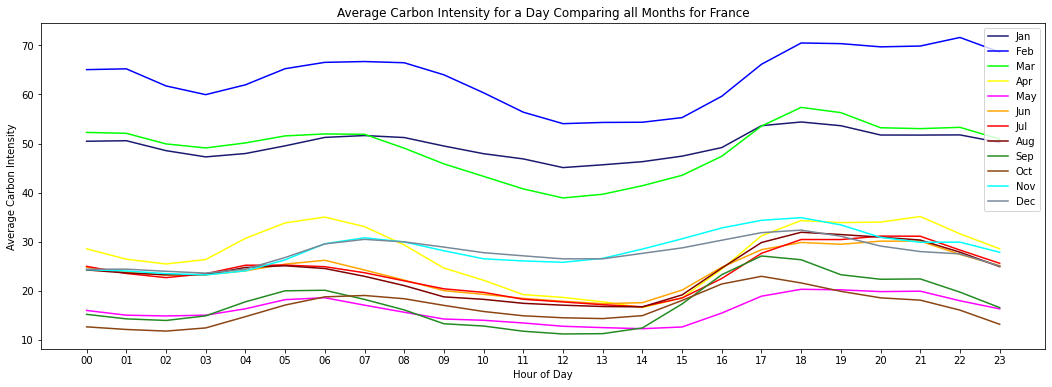

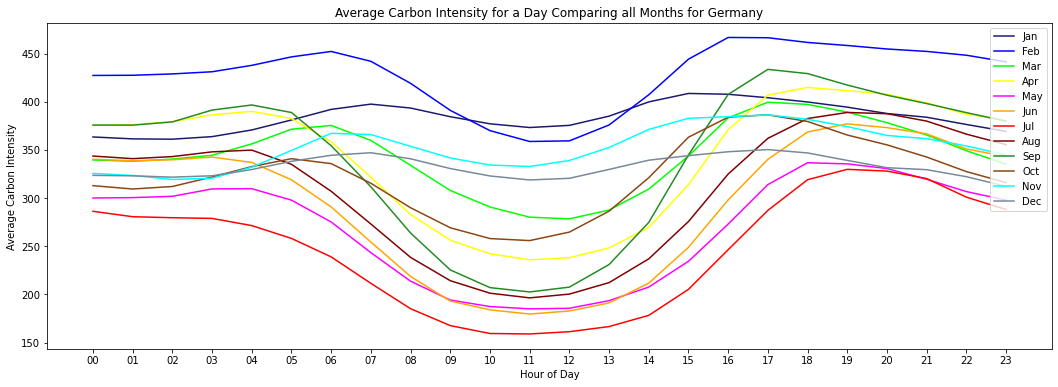

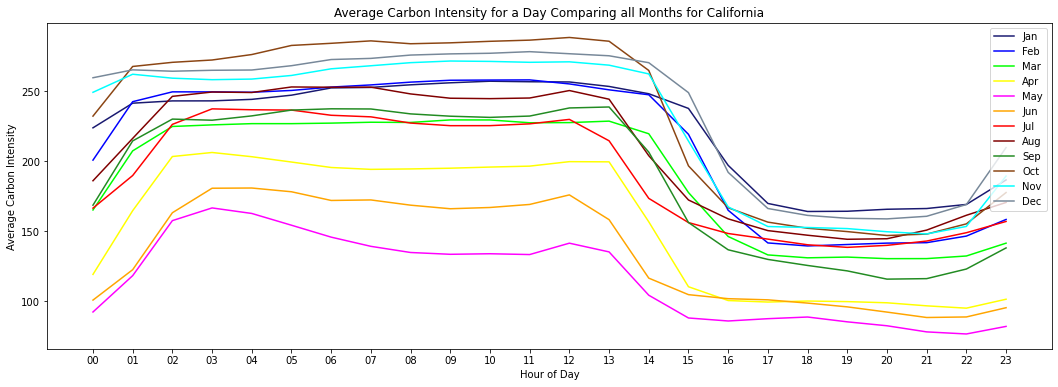

In [111]:
plot_avg_ci_for_day_compare_month(df=uk_ci_df, region="UK")
plot_avg_ci_for_day_compare_month(df=fr_ci_df, region="France")
plot_avg_ci_for_day_compare_month(df=de_ci_df, region="Germany")
plot_avg_ci_for_day_compare_month(df=ca_ci_df, region="California")

**Plot the Average Carbon Intensity for Each Day Comparing all Regions**  

- As shown, in 2023, if you considered the average day, France has little variation in Carbon Intensity, whereas the others range more significantly...
- If you were in the UK, it might be preferrable to look at the lower Carbon Intensity at night, or in the middle of the day rather than in the morning and evening.
- If you were in California, it is much lower in the evening hours.
- If you were in Germany, it was lowest around the middle of the day.  

These observations make sense given the graph, however, it doesn't tell us much about how Carbon Intensity varies across different times of the year, which the other graphs will explore further. 

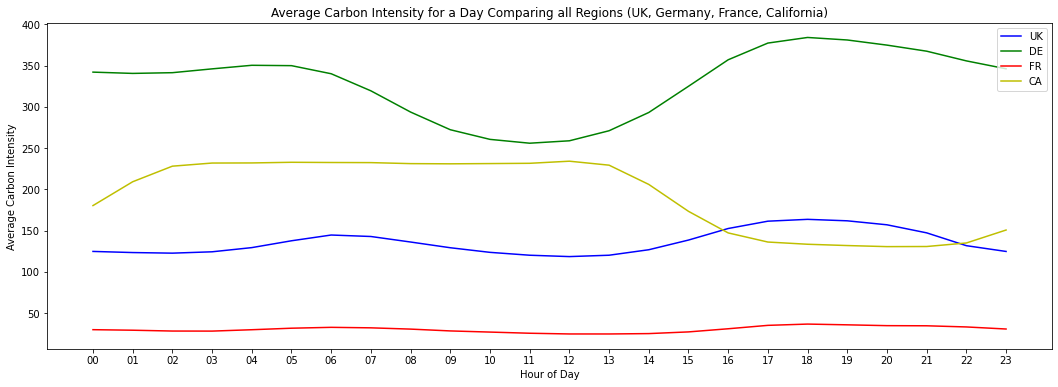

In [112]:
plot_avg_ci_for_day_compare_all()

**Plot the Average Carbon Intensity for Each Day Comparing for Each Quarter for All Regions**

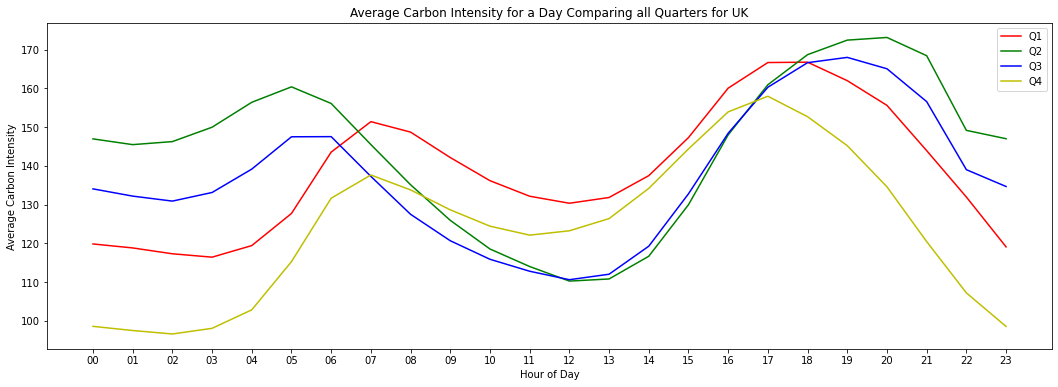

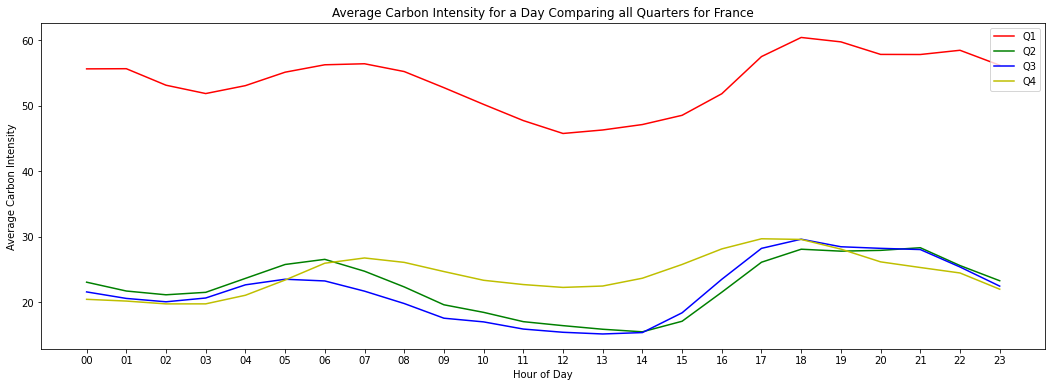

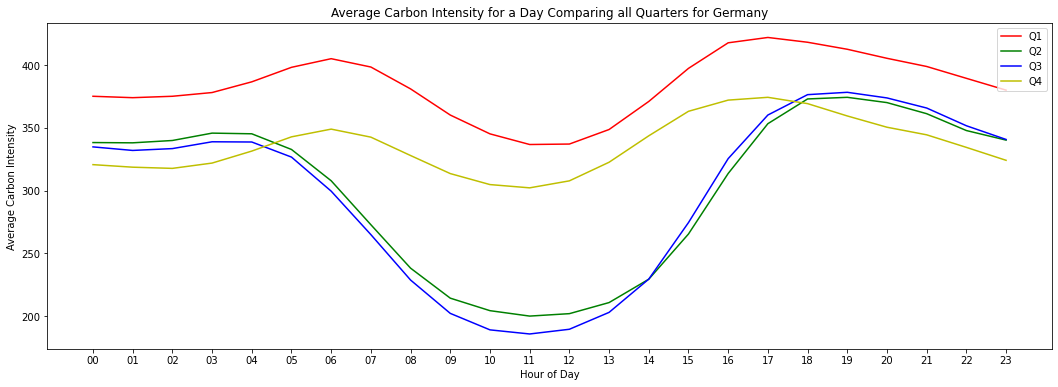

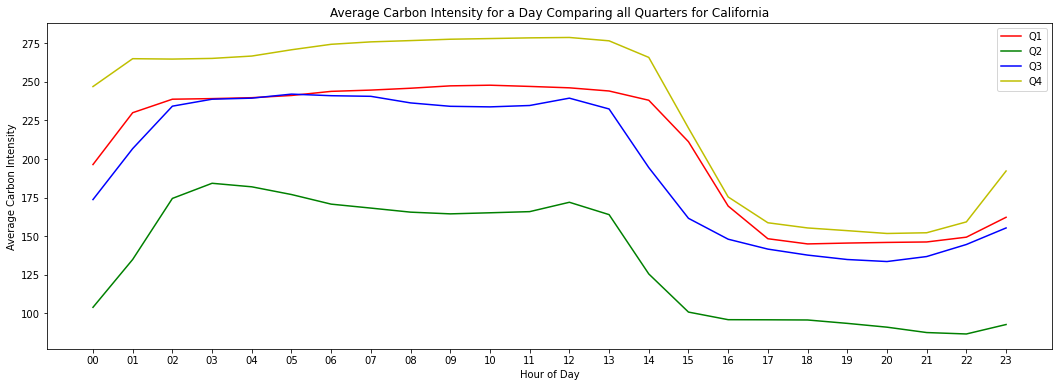

In [113]:
plot_avg_ci_for_day_compare_quarter(df=uk_ci_df, region='UK')
plot_avg_ci_for_day_compare_quarter(df=fr_ci_df, region='France')
plot_avg_ci_for_day_compare_quarter(df=de_ci_df, region='Germany')
plot_avg_ci_for_day_compare_quarter(df=ca_ci_df, region='California')

**UK Carbon Intensity Data Analysis**

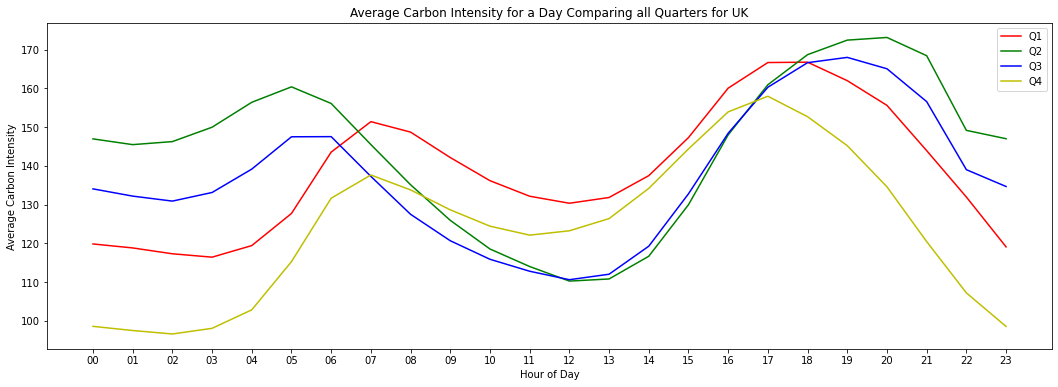

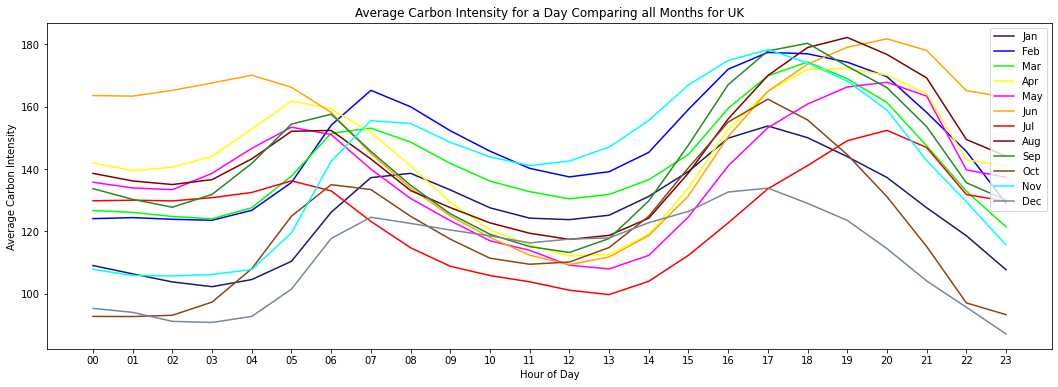

In [84]:
plot_avg_ci_for_day_compare_quarter(df=uk_ci_df, region='UK')
plot_avg_ci_for_day_compare_month(df=uk_ci_df, region="UK")

**Average Carbon Intensity for March, April and May (Spring)**

- 

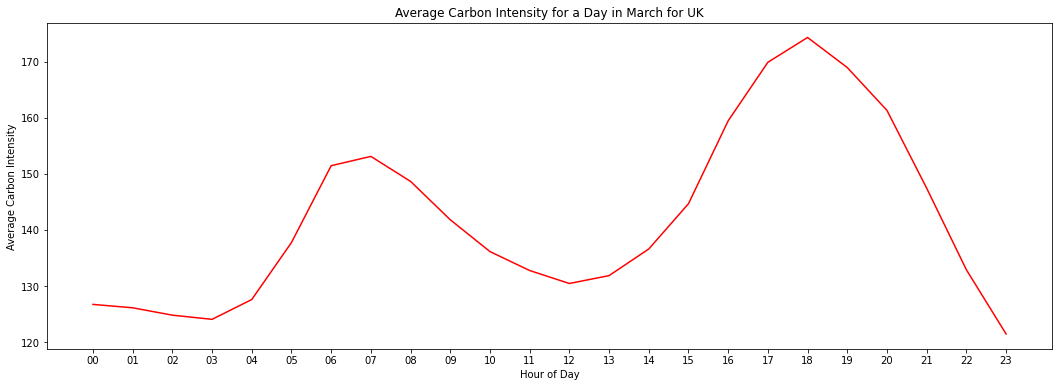

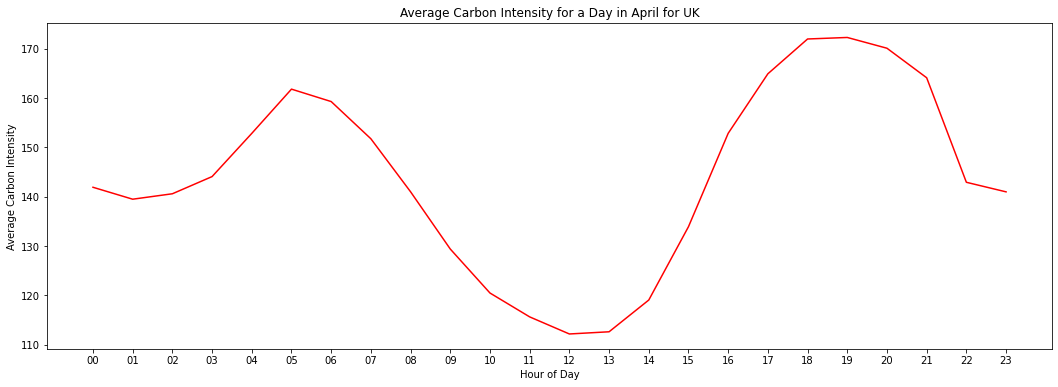

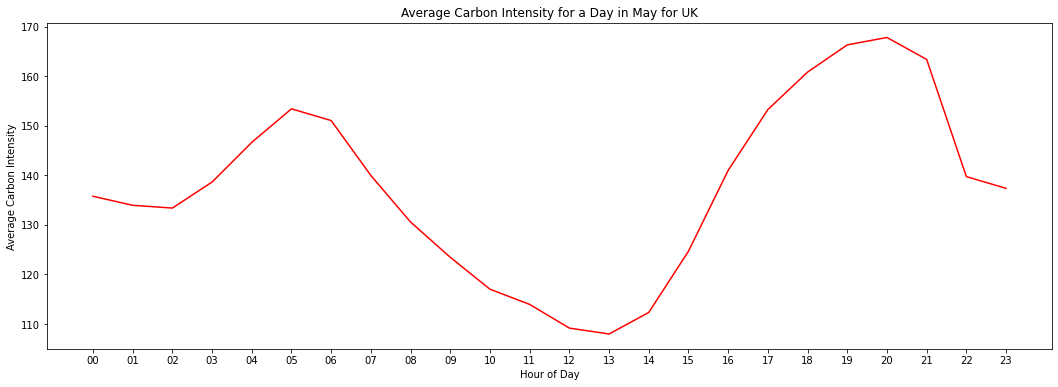

In [81]:
plot_avg_ci_for_day_in_month(df=uk_ci_df, region="UK", month="03", name="March")
plot_avg_ci_for_day_in_month(df=uk_ci_df, region="UK", month="04", name="April")
plot_avg_ci_for_day_in_month(df=uk_ci_df, region="UK", month="05", name="May")

**Average Carbon Intensity for June, July and August (Summer)**

- 

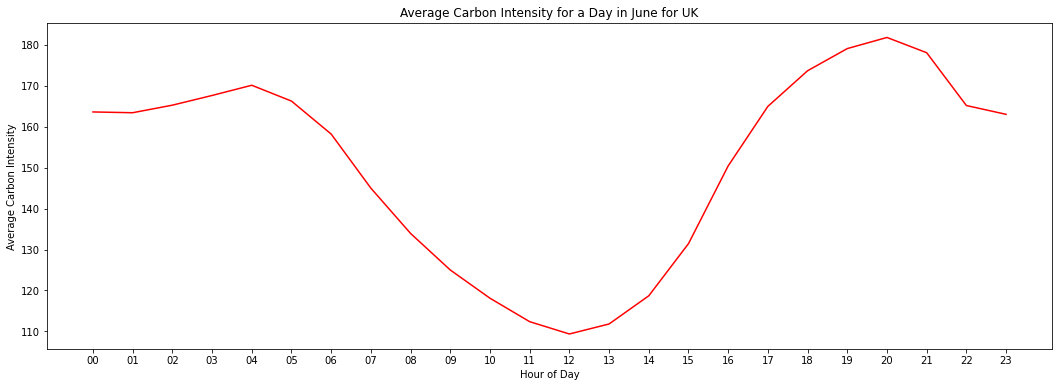

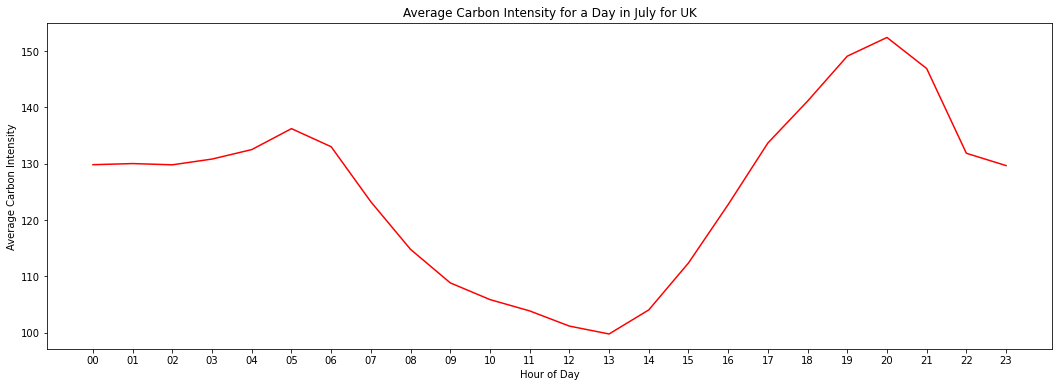

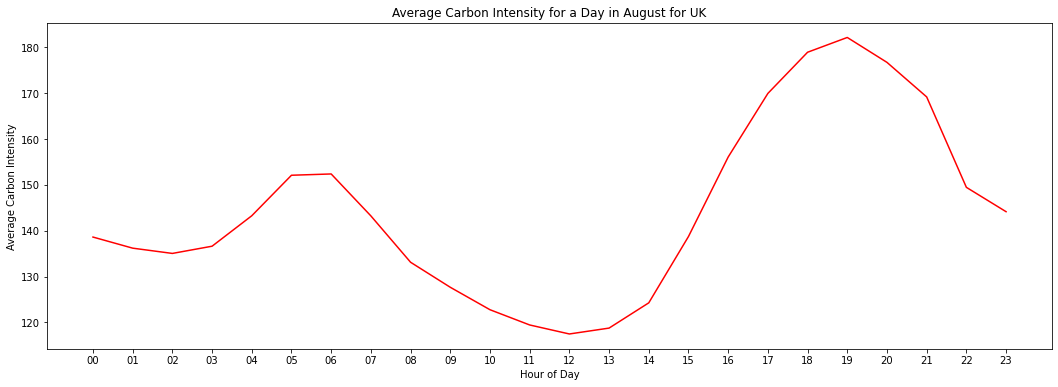

In [82]:
plot_avg_ci_for_day_in_month(df=uk_ci_df, region="UK", month="06", name="June")
plot_avg_ci_for_day_in_month(df=uk_ci_df, region="UK", month="07", name="July")
plot_avg_ci_for_day_in_month(df=uk_ci_df, region="UK", month="08", name="August")

**Average Carbon Intensity for September, October and November (Autumn)**

- 

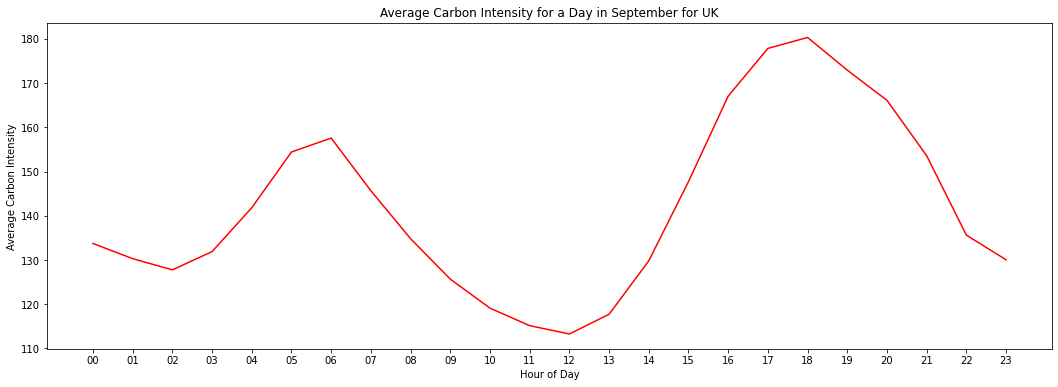

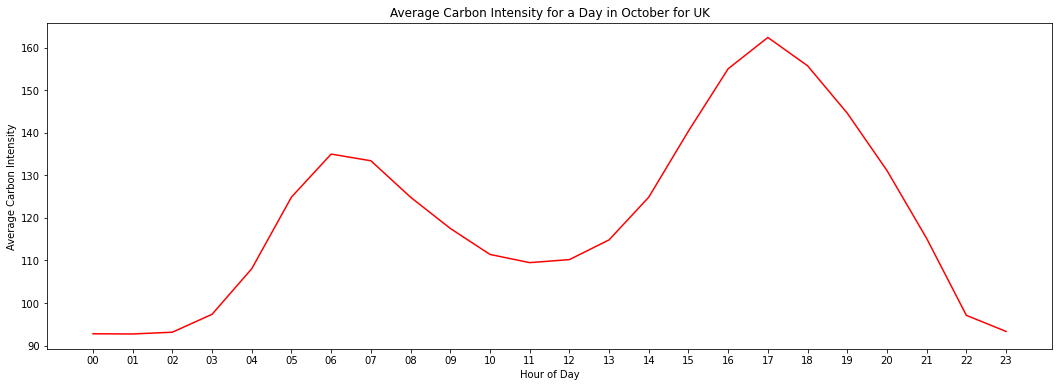

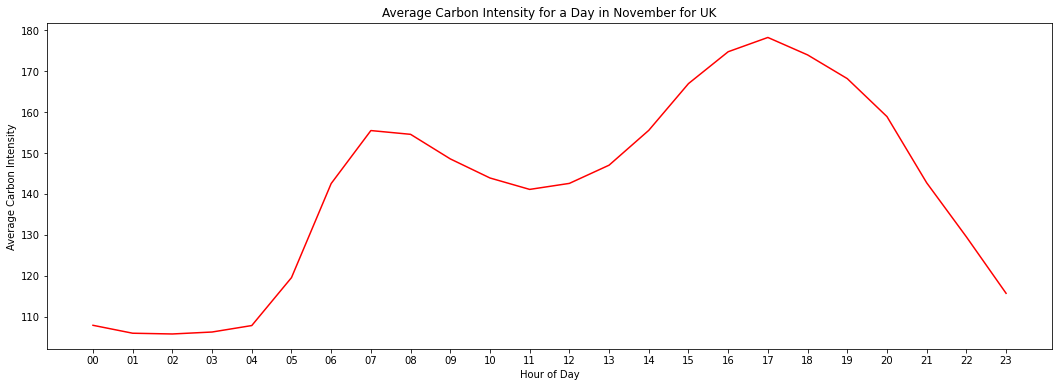

In [83]:
plot_avg_ci_for_day_in_month(df=uk_ci_df, region="UK", month="09", name="September")
plot_avg_ci_for_day_in_month(df=uk_ci_df, region="UK", month="10", name="October")
plot_avg_ci_for_day_in_month(df=uk_ci_df, region="UK", month="11", name="November")

**Average Carbon Intensity for December, January and February (Winter)**

- 

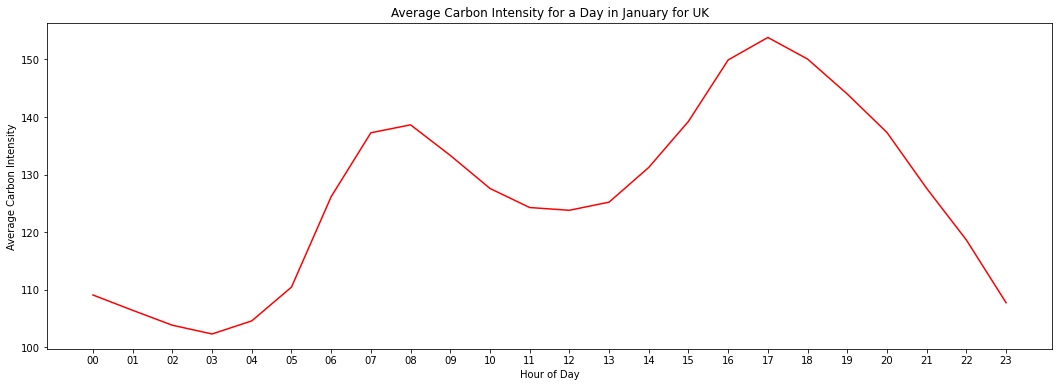

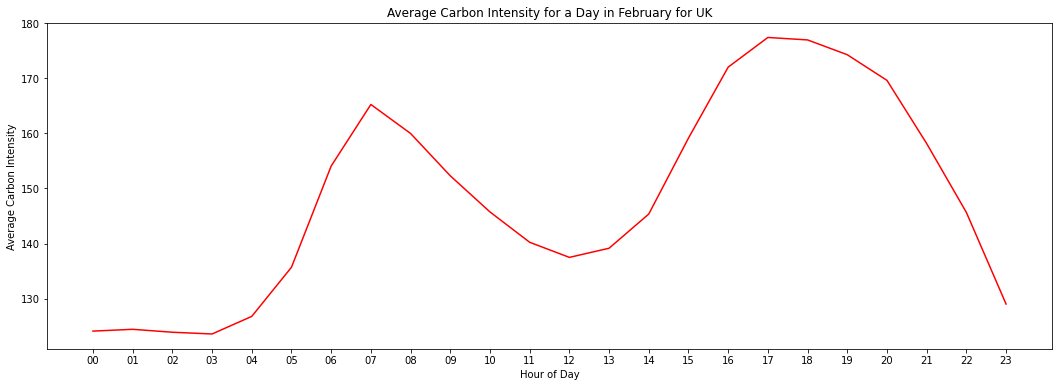

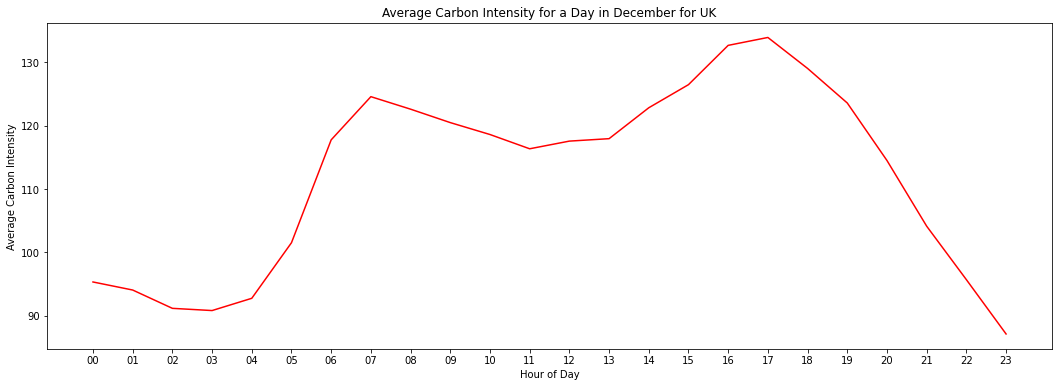

In [85]:
plot_avg_ci_for_day_in_month(df=uk_ci_df, region="UK", month="01", name="January")
plot_avg_ci_for_day_in_month(df=uk_ci_df, region="UK", month="02", name="February")
plot_avg_ci_for_day_in_month(df=uk_ci_df, region="UK", month="12", name="December")

**Analysis for Typical Week (averaging from whole year) in the UK**

- the weekend seems to have lower carbon intensity values - why is that?
- does the pattern remain regular if considering months on their own, can try grouping by specific months and passing into the same method ?

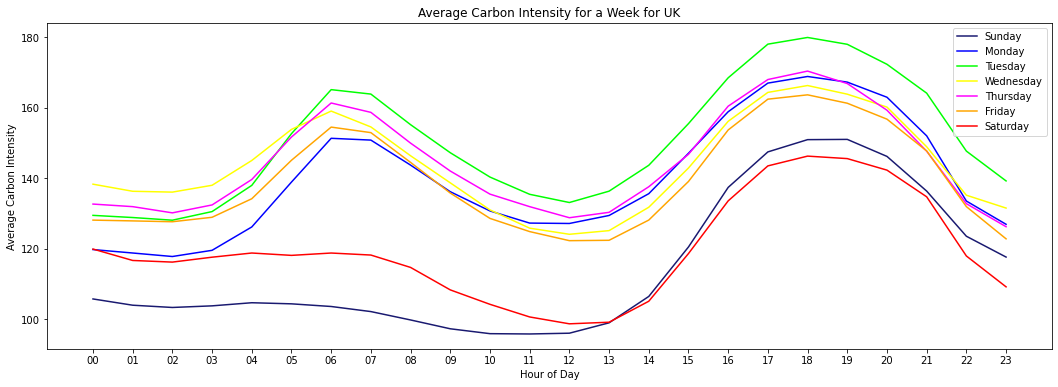

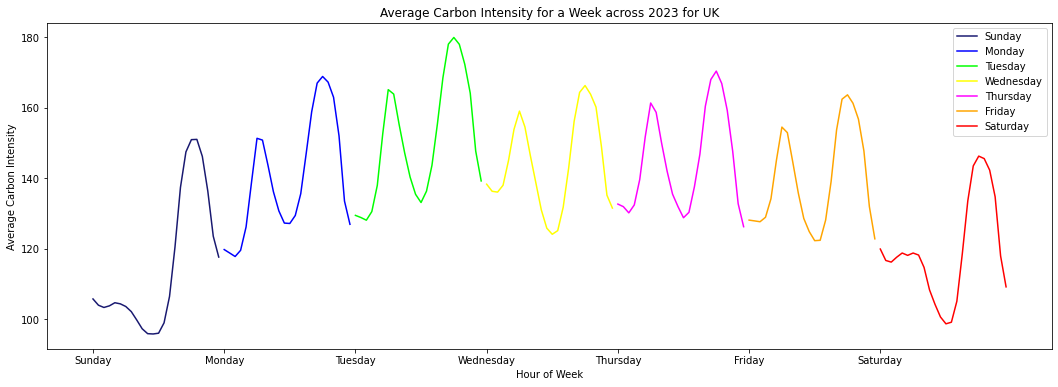

In [116]:
plot_avg_ci_for_week(uk_ci_df, "UK")
plot_avg_ci_for_week_long(uk_ci_df, "UK", "2023")

In [117]:
uk_ci_df_by_month = uk_ci_df.groupby('month', as_index=False, sort=False)

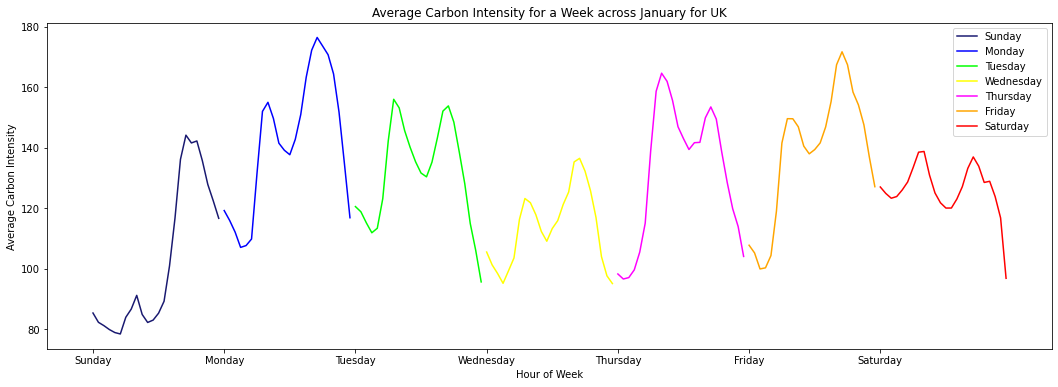

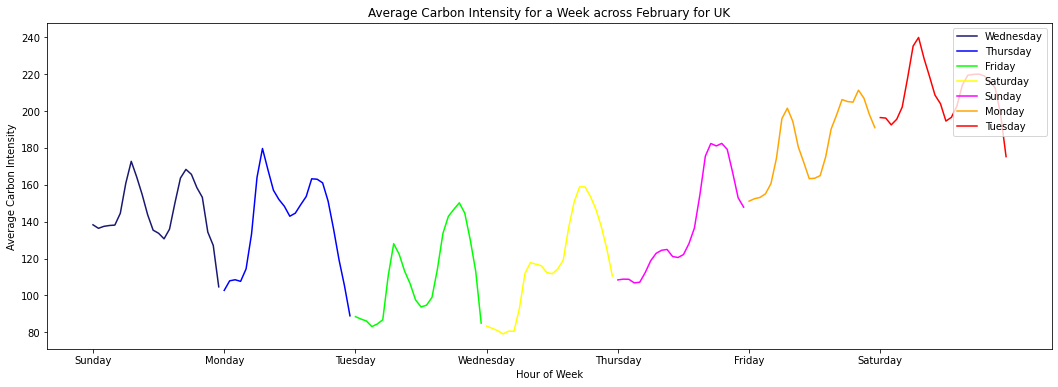

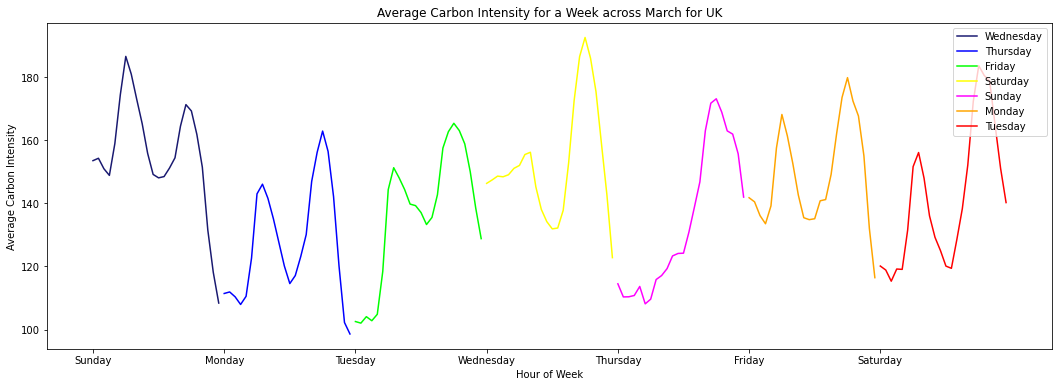

In [118]:
plot_avg_ci_for_week_long(uk_ci_df_by_month.get_group("01"), "UK", "January")
plot_avg_ci_for_week_long(uk_ci_df_by_month.get_group("02"), "UK", "February")
plot_avg_ci_for_week_long(uk_ci_df_by_month.get_group("03"), "UK", "March")

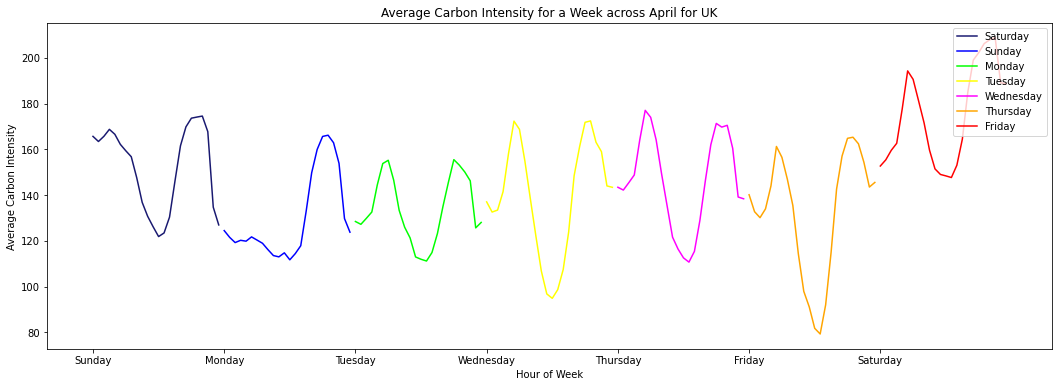

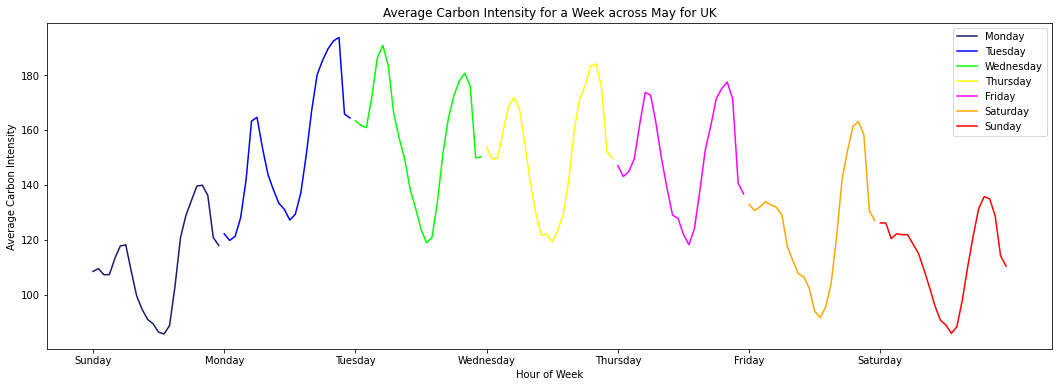

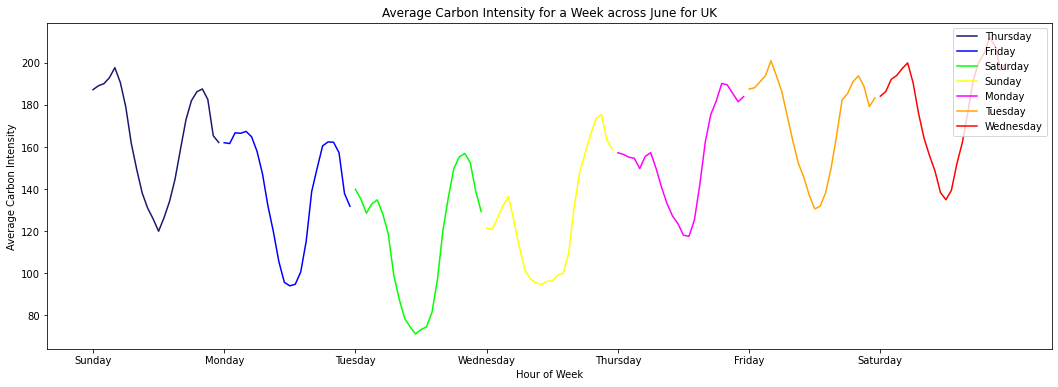

In [119]:
plot_avg_ci_for_week_long(uk_ci_df_by_month.get_group("04"), "UK", "April")
plot_avg_ci_for_week_long(uk_ci_df_by_month.get_group("05"), "UK", "May")
plot_avg_ci_for_week_long(uk_ci_df_by_month.get_group("06"), "UK", "June")

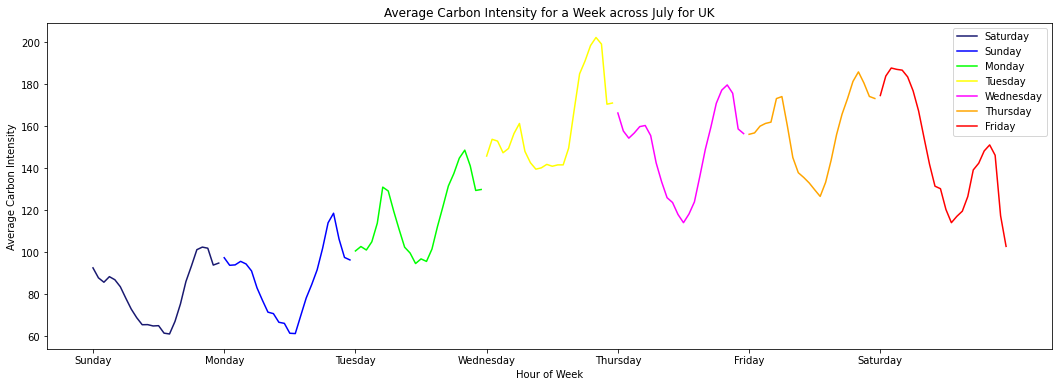

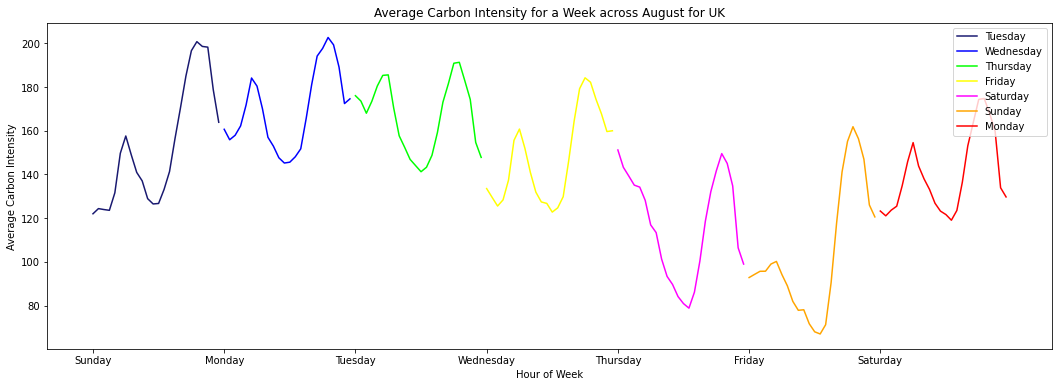

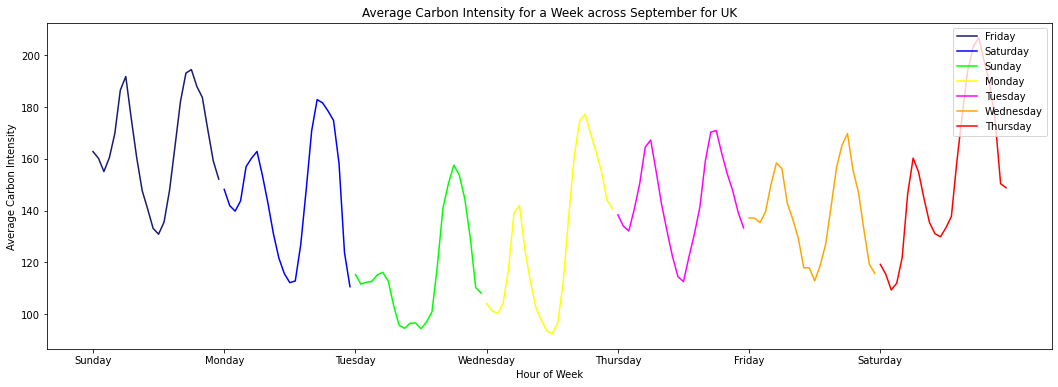

In [120]:
plot_avg_ci_for_week_long(uk_ci_df_by_month.get_group("07"), "UK", "July")
plot_avg_ci_for_week_long(uk_ci_df_by_month.get_group("08"), "UK", "August")
plot_avg_ci_for_week_long(uk_ci_df_by_month.get_group("09"), "UK", "September")

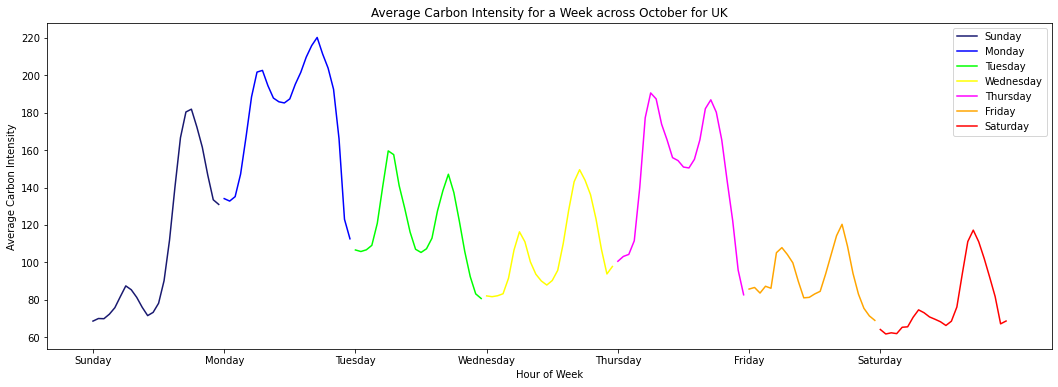

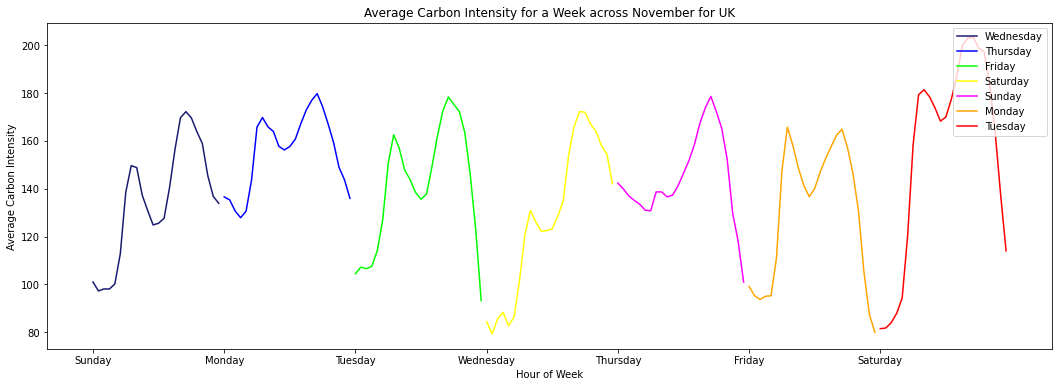

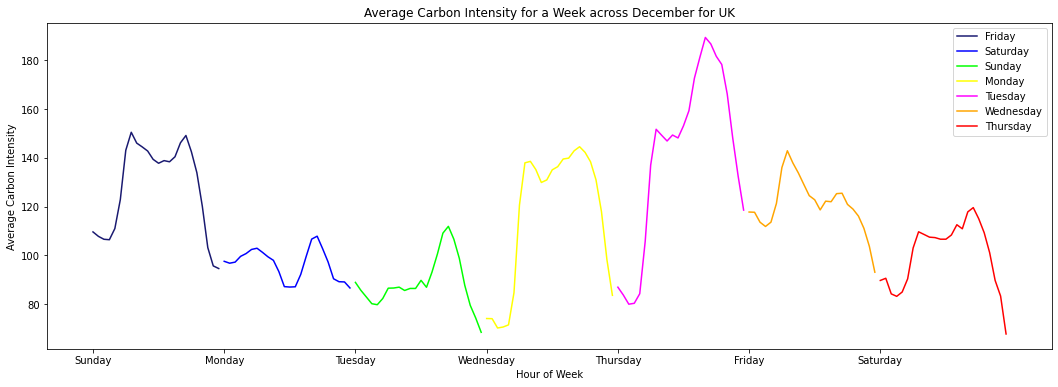

In [121]:
plot_avg_ci_for_week_long(uk_ci_df_by_month.get_group("10"), "UK", "October")
plot_avg_ci_for_week_long(uk_ci_df_by_month.get_group("11"), "UK", "November")
plot_avg_ci_for_week_long(uk_ci_df_by_month.get_group("12"), "UK", "December")

**January**

- pattern for a day in January has lowest carbon intensity overnight, and during the middle of the day
- across a typical week in January, this seems to be the lowest on Sundays and Wednesdays (as shown below)

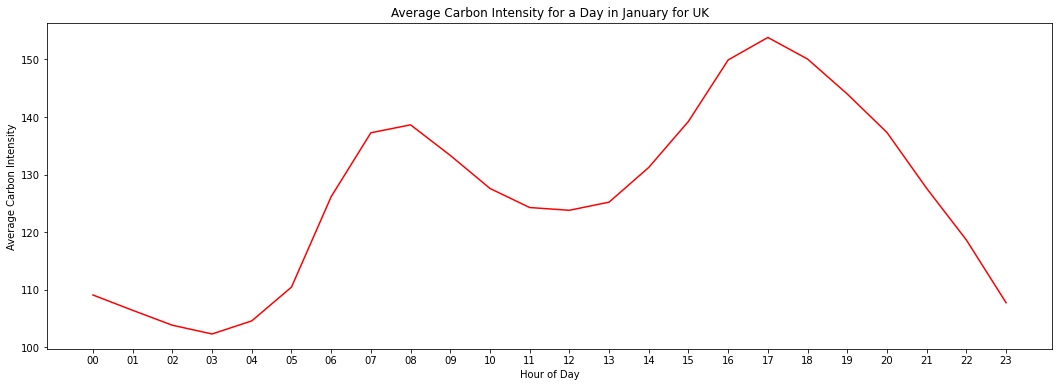

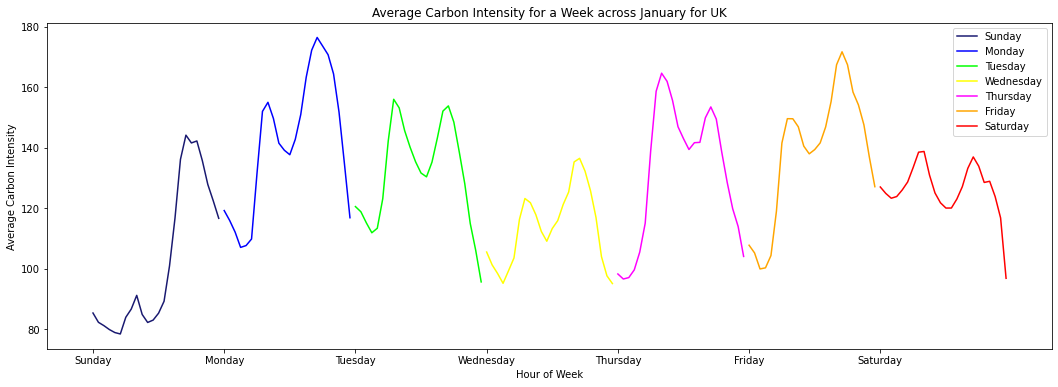

In [123]:
plot_avg_ci_for_day_in_month(df=uk_ci_df, region="UK", month="01", name="January")
plot_avg_ci_for_week_long(uk_ci_df_by_month.get_group("01"), "UK", "January")